# Decision Trees/Regression Trees on the Titanic Dataset

Decision Trees are widely used in machine learning for their interpretability and simplicity. They are particularly valuable when a clear understanding of decision logic is necessary. In this notebook, we will use the Titanic dataset to demonstrate how Decision Trees can be applied to predict survival based on features like passenger class, sex, and age.

## Algorithm - Decision Trees

- **Decision Trees**:
  - Begin with the entire dataset at the root.
  - Choose the best feature to split the data based on a criterion like Gini impurity or information gain.
  - Recursively split subsets of the dataset until terminal nodes are pure or some stopping criterion is met.
  - At each leaf node, assign the most common class of the training samples in that leaf.

### Advantages and Disadvantages

- **Advantages**:
  - Highly interpretable and easy to visualize.
  - Can handle both numerical and categorical data.
  - Robust to outliers and can model non-linear relationships.

- **Disadvantages**:
  - Prone to overfitting without proper tuning.
  - Can be unstable with small changes to the data.

### Dataset

We will use the Titanic dataset, which contains passenger information such as age, fare, class, and survival status. The target variable is binary, indicating whether a passenger survived or not.

### Implementation

- **Decision Tree for Classification**:
  - Predict passenger survival using the Titanic dataset's features.


Accuracy: 0.7027027027027027

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.88      0.62      0.73        24

    accuracy                           0.70        37
   macro avg       0.72      0.74      0.70        37
weighted avg       0.77      0.70      0.71        37


Confusion Matrix:
 [[11  2]
 [ 9 15]]


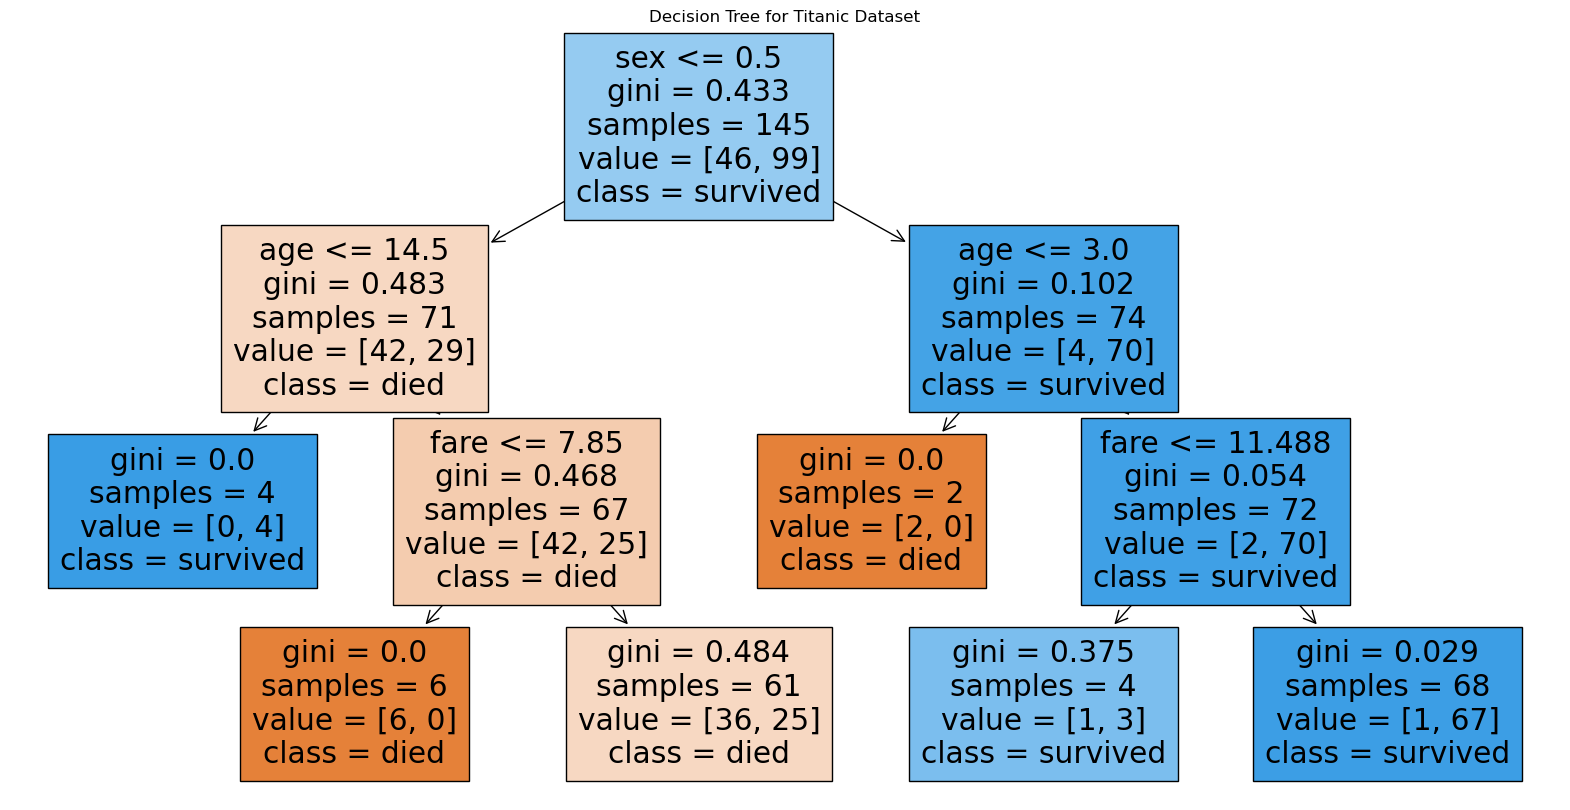

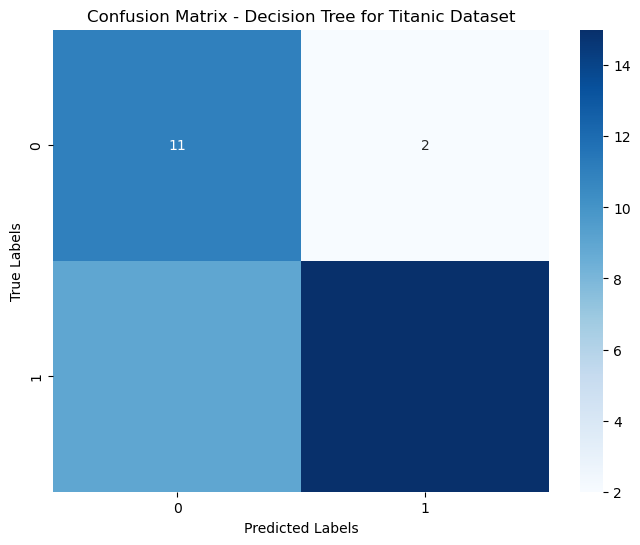

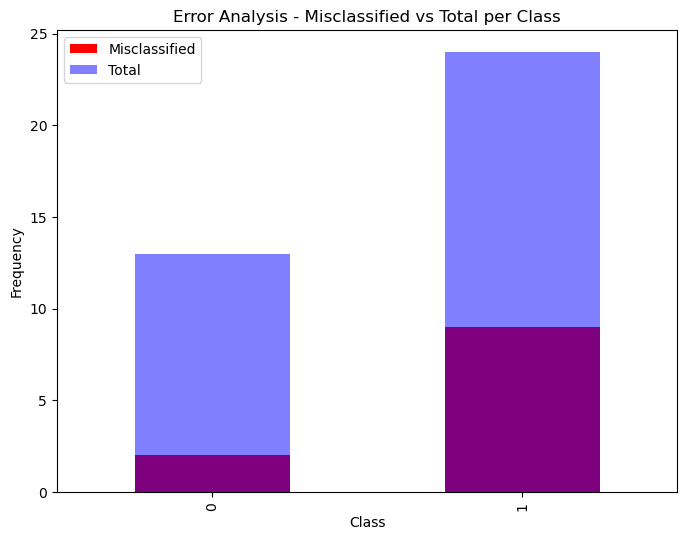

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
titanic_df = sns.load_dataset('titanic')

# Preprocessing
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
titanic_df = titanic_df.dropna()

# Features and target
X = titanic_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic_df['survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(tree_classifier, feature_names=X.columns, class_names=['died', 'survived'], filled=True)
plt.title('Decision Tree for Titanic Dataset')
plt.show()

# Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree for Titanic Dataset')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Error Analysis
errors = (y_pred != y_test)
error_rate = errors.sum() / errors.size * 100
error_classes = y_test[errors].value_counts().sort_index()

plt.figure(figsize=(8, 6))
error_classes.plot(kind='bar', color='red', label='Misclassified')
y_test.value_counts().sort_index().plot(kind='bar', alpha=0.5, color='blue', label='Total')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Error Analysis - Misclassified vs Total per Class')
plt.legend()
plt.show()

### Interpretation of Decision Tree Classifier Results

The decision tree classifier applied to the Titanic dataset provides a visual and quantitative analysis of the survival prediction. The tree's root node starts with the 'Sex' feature, emphasizing the significant role gender played in survival rates during the Titanic disaster. Subsequent nodes split on 'Age' and 'Fare', indicating their importance in the model's predictions.

#### Performance Metrics:
- **Accuracy**: The model achieved an accuracy of approximately 70.27%, indicating a moderate ability to correctly classify survivors and non-survivors.
- **Precision** and **Recall**:
  - For predicting non-survivors (class 0), the model has a precision of 0.55 and a recall of 0.85, suggesting that while it's quite good at identifying the actual non-survivors, it also misclassifies survivors as non-survivors fairly often.
  - For survivors (class 1), the precision is 0.88, and the recall is 0.62, showing that when the model predicts a survivor, it is usually correct, but it misses a significant number of actual survivors.

#### Confusion Matrix Analysis:
The confusion matrix shows 11 true negatives and 15 true positives, indicating correct predictions for non-survivors and survivors, respectively. However, there are 2 false positives and 9 false negatives, showing some misclassifications, particularly in falsely predicting deaths.

#### Visual Analysis:
- The decision tree visualization reveals that children (age <= 14.5) have been categorized as survivors, reflecting historical accounts that children were given priority in lifeboats.
- The tree's decision paths show varying levels of Gini impurity, with several leaf nodes achieving Gini = 0, indicating perfect classification for the samples reaching those nodes.

### Conclusion

The decision tree's predictions reflect well-documented survival factors on the Titanic, such as gender and age. With an overall accuracy of over 70%, the model demonstrates a solid foundation for predicting survival outcomes. The precision and recall metrics indicate that while the model is conservative in predicting survivors (class 1), leading to a higher false negative rate, it is also prone to misclassifying some survivors as non-survivors.

To enhance the model, we could consider:
- Feature engineering to capture interactions between variables.
- Hyperparameter tuning to balance the trade-off between overfitting and underfitting.
- Ensemble methods to improve predictive power and stability.

In future work, these steps could help improve the model's predictive performance and reduce misclassification rates.

## Algorithm - Regression Trees

Regression Trees are a subtype of decision trees that are used for predicting a continuous quantity. In this notebook, we will be applying a Regression Tree to predict the fare paid by passengers on the Titanic, which can be considered a continuous value indicative of passengers' socio-economic status.

### Dataset

For the Regression Tree part, we will use the Titanic dataset, focusing on the 'Fare' column as the target variable for our regression task.

- The dataset includes passenger features such as class, sex, age, and number of siblings/spouses aboard.
- Our goal is to predict the fare paid using these features, which can provide insights into the socio-economic distribution of the Titanic's passengers.

### Implementation


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4}
Mean Squared Error: 2305.5093998740235
R-squared: 0.34775546632653054


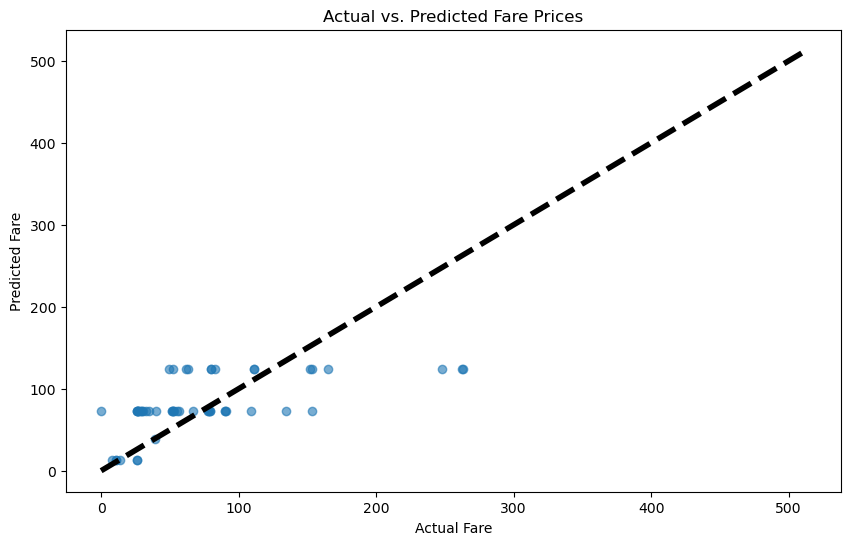

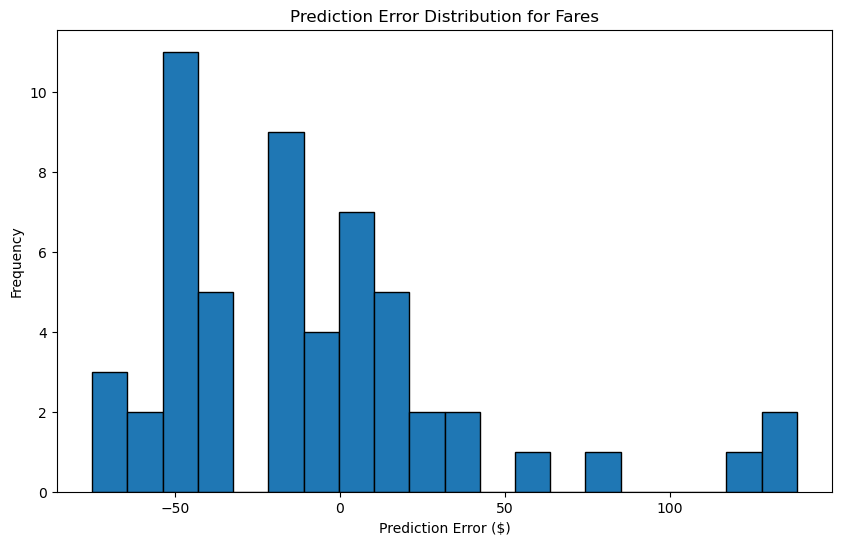

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Selecting features and target variable
X = titanic_df[['pclass', 'sex', 'age', 'sibsp', 'parch']]
y = titanic_df['fare']  # Target variable is 'Fare' this time

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'max_depth': range(3, 20),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20)
}

# Initialize the GridSearchCV with the Regression Tree
regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_regressor = grid_search.best_estimator_

# Prediction and evaluation
y_pred = best_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the best parameters and scores
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the actual vs. predicted fare prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fare Prices')
plt.show()

# Error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution for Fares')
plt.show()

### Interpretation of Regression Tree Results

The Regression Tree model was tasked with predicting the fare prices for passengers on the Titanic. From the results and visualizations, we can interpret the model's performance as follows:

- The **Best Parameters** obtained from the grid search — max depth of 3, minimum samples per leaf of 1, and minimum samples split of 4 — indicate a relatively simple tree that avoids overfitting while attempting to capture the underlying structure in the fare data.
- The **Mean Squared Error (MSE)** of 2305.51 signifies that the model's predictions are, on average, approximately $2305.51 away from the actual fare values. Given the scale of fare prices, this suggests room for improvement in the model's predictive accuracy.
- An **R-squared** value of 0.3477 means that around 34.77% of the variance in the actual fare is explained by the model, which is relatively low. This suggests that the model does not capture much of the complexity in the data that determines fare prices.

The scatter plot of **Actual vs. Predicted Fare Prices** shows that for lower fares, the model has a tighter clustering around the line of perfect prediction, whereas for higher fares, the predictions are more dispersed, indicating less accuracy.

The **Prediction Error Distribution** histogram reveals that most of the errors are clustered around 0, which is positive, but there are also instances of significant overestimation and underestimation, as shown by the tails of the distribution.

### Conclusion

Our regression tree has demonstrated the ability to predict fare prices on the Titanic dataset with a degree of accuracy, particularly for lower-priced tickets. However, the predictive performance is less reliable for higher-priced fares, as evidenced by the higher dispersion in the scatter plot and the spread in the error distribution.

Given the complexity of factors that influence fare prices, such as cabin location, ticket class, and additional amenities, a more sophisticated model or additional features could potentially improve the accuracy of the predictions. The insights from this analysis can be used to refine the model further, exploring more granular data or ensemble methods that may capture the fare structure's nuances more effectively.
